# Adult Income

This notebook will explore US Adult Income data and answer the following questions:
1. What is the pay gap for Males vs Females
2. Which gender is "more" educated
3. Which gender works more hours
4. Is there a relationship between hours work and income level?
5. Is there a relationship between income level and level of education?


In [1]:
#Packages used for model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#For visuals
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',None)

c:\Users\bartl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
adult = pd.read_csv('../data/adult.csv')

adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
adult = adult.replace({'?': 'Unknown'})

In [4]:
#Creating a new column to hold random income
adult['random_income'] = adult['income']
 
# Generate random income value for rows that are '>50k' in income
adult.loc[adult['income'] == '>50K', 'random_income'] = np.random.uniform(50001, 500000, size=np.sum(adult['income'] == '>50K'))

# Generate random income value for rows that are '<=50k' in income
adult.loc[adult['income'] == '<=50K', 'random_income'] = np.random.uniform(1000, 50000, size=np.sum(adult['income'] == '<=50K'))

#Convert the random_income column to integer type
adult['random_income'] = adult['random_income'].astype(int)

In [5]:
adult['marital.status'] = adult['marital.status'].replace('Never-married', 'Single')

In [11]:
adult['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [12]:
educate_update = ['HS-grad', '11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']
educate_new = ['Some-college', 'Bachelors']
educate_adv = ['Masters', 'Doctorate']
educate_tech = ['Assoc-voc', 'Assoc-acdm', 'Prof-school']

In [15]:
adult['education'] = adult['education'].replace(educate_update, 'Highschool Graduate') \
    .replace(educate_new, 'Bachelors Degree') \
    .replace(educate_adv, 'Advanced Degree') \
    .replace(educate_tech,  'Technical School')

In [16]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,random_income
0,90,Unknown,77053,Highschool Graduate,9,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,<=50K,11697
1,82,Private,132870,Highschool Graduate,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,5958
2,66,Unknown,186061,Bachelors Degree,10,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,<=50K,32974
3,54,Private,140359,Highschool Graduate,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,8208
4,41,Private,264663,Bachelors Degree,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,45292


In [17]:
adult['education'].value_counts()

Highschool Graduate    14754
Bachelors Degree       12646
Technical School        3025
Advanced Degree         2136
Name: education, dtype: int64

In [50]:
adult['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [54]:
relat_update = ['Husband', 'Wife']
relat_new = ['Own-child', 'Unmarried', 'Other-relative', 'Not-in-family']


In [55]:
adult['relationship'] = adult['relationship'].replace(relat_update, 'Married') \
    .replace(relat_new, 'Single')

In [56]:
adult['relationship'].value_counts()

Single     17800
Married    14761
Name: relationship, dtype: int64

Now that the data has been cleaned and all columns are more reader-friendly, we can split the data into two groups: Male & Female. This will allows us to conduct the analysis of which gender leads in different categories


In [57]:
adult_m = adult[adult['sex'] == 'Male']
adult_f = adult[adult['sex'] == 'Female']

In [58]:
adult_m.drop(['sex'], axis=1, inplace=True)
adult_f.drop(['sex'], axis=1, inplace=True)

In [59]:
print(f'There are {adult_m.value_counts().sum()} participants in the adult male dataframe')
print(f'\n There are {adult_f.value_counts().sum()} participants in the adult female dataframe')

There are 21790 participants in the adult male dataframe

 There are 10771 participants in the adult female dataframe


Since there are practically double the amount of male participants compared to female participants, we will be taking random samples for comparing the data to ensure we making equal comparions

In [74]:
#Setting a sample size for visualizing the data
sample_size  = 5000

In [81]:
def get_comparison(column, name):
    male_sample = adult_m[column].sample(sample_size, random_state=42)
    female_sample = adult_f[column].sample(sample_size, random_state=42)

    male_sample_counts = male_sample.value_counts()
    female_sample_counts = female_sample.value_counts()

    plt.scatter(male_sample_counts.index, male_sample_counts.values, label='Adult Male', alpha=0.2)
    plt.scatter(female_sample_counts.index, female_sample_counts.values, label='Adult Female', alpha=0.9)

    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Count')
    plt.title(f'{name} Level Comparison: Males vs Females (Sampled)')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show() 

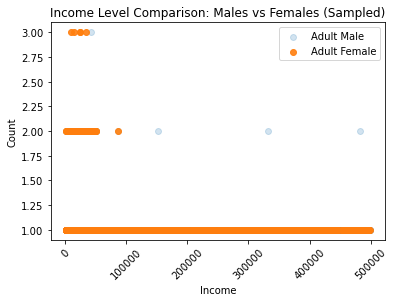

In [82]:
get_comparison('random_income', 'Income')

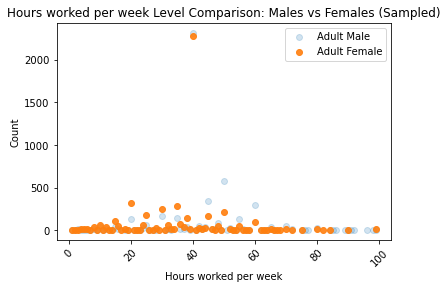

In [83]:
get_comparison('hours.per.week', "Hours worked per week")

In [89]:
def detailed_comparison(column, name):
    male_sample = adult_m[column].sample(sample_size, random_state=42)
    female_sample = adult_f[column].sample(sample_size, random_state=42)

    male_sample_counts = male_sample.value_counts()
    female_sample_counts = female_sample.value_counts()

    education_levels = sorted(set(male_sample.unique()).union(set(female_sample.unique())))

    # Initialize lists to store the annotation labels and positions
    annotations = []
    annotation_pos = []

    # Iterate over each level
    for level in education_levels:
        male_count = male_sample_counts.get(level, 0)
        female_count = female_sample_counts.get(level, 0)
        
        annotations.append(f"of {sample_size} men, {male_count} have {level}")
        annotations.append(f"of {sample_size} women, {female_count} have {level}")
        
        annotation_pos.append(male_count)
        annotation_pos.append(female_count)

    # Create the bar chart
    plt.figure(figsize=(10,6))
    plt.bar(range(len(education_levels)*2), annotation_pos)

    # Add annotations to the chart
    for i in range(len(education_levels)*2):
        plt.annotate(annotations[i], xy=(i, annotation_pos[i]), xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', rotation=45, fontsize=8)

    plt.xlabel(f'Gender and {name} Level')
    plt.ylabel('Count')
    plt.title(f'{name} Level Comparison: Males vs Females (Sampled)')
    plt.xticks(range(len(education_levels)*2), [f'Male {education_levels[i//2]}' if i%2==0 else f'Female {education_levels[i//2]}' for i in range(len(education_levels)*2)], rotation=45)
    plt.tight_layout()
    plt.show()


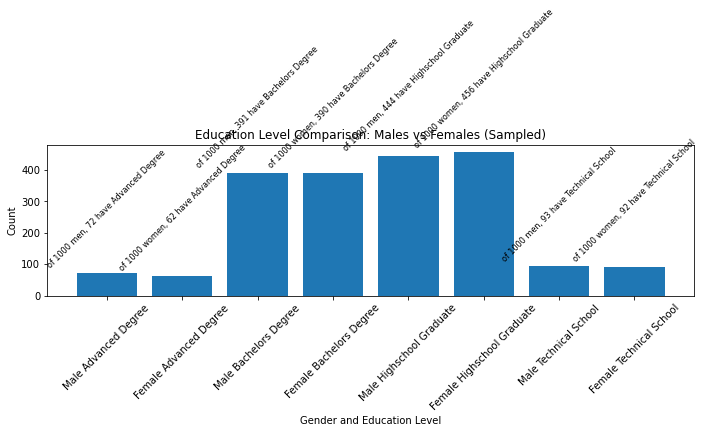

In [90]:
detailed_comparison('education', 'Education')

The results here just about as expected. Both genders are just about equal on bachelors degrees with men at 391 per 1000 and women at 390 per 1000. There are slightly more female highschool graduates than male highschool graduates. Lastly, men slightly edge out women in advanced degrees.

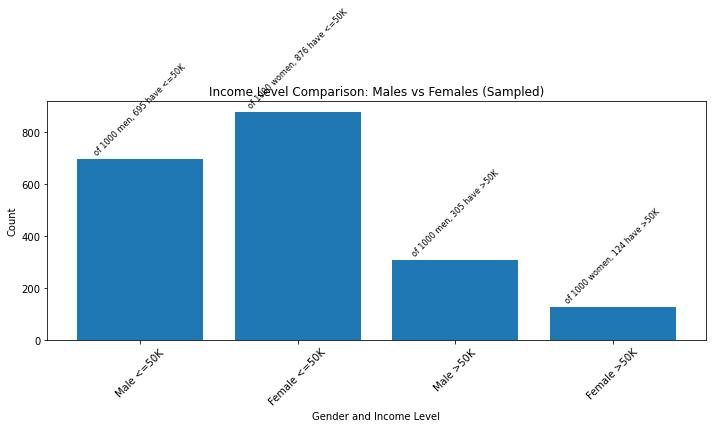

In [92]:
detailed_comparison('income', 'Income')

Based on these results we can see there is pay gap between Males and Females. With a sample size of 1000 randomly selected participants, about 876 women make less than or equal to $50,000 while about 695 men make less than or equal to $50,000. However, when we look at the higher scale, about 305 men make more than $50,000 compared to only about 124 women that make more than $50,000. 

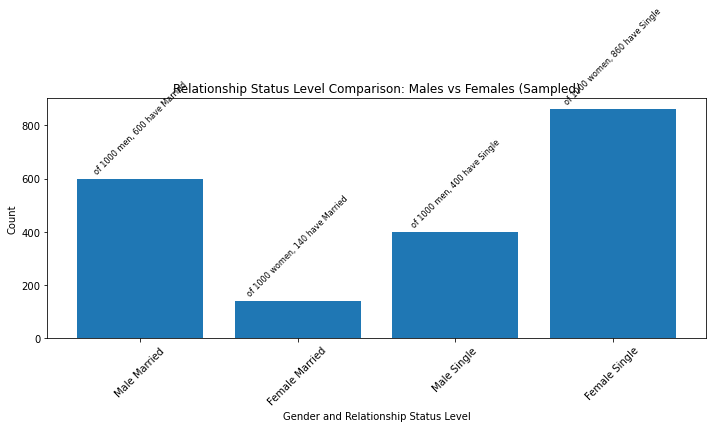

In [93]:
detailed_comparison('relationship', 'Relationship Status')

In [98]:
def side_comparison(column1, column2, name, comp):
    adult_sample_hours = adult[column1].sample(sample_size, random_state=42)
    adult_sample_income = adult[column2].sample(sample_size, random_state=42)

    plt.scatter(adult_sample_hours, adult_sample_income)
    plt.xlabel(name)
    plt.ylabel(comp)
    plt.title(f'Relationship between {name} and {comp}')
    plt.show()

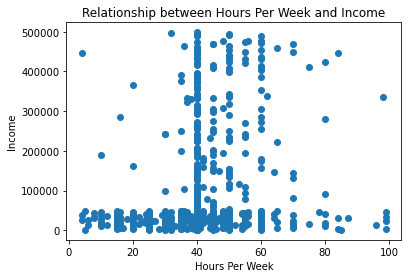

In [99]:
side_comparison('hours.per.week', 'random_income', 'Hours Per Week', 'Income')

The data above looks a little messy but it tells a story. The group of participants working less than 40 hours per week finds most of its data points between $0 - $50,000 with a few outliers going beyond the $50,000 mark. We can also see that individuals working an extreme weekly total of 80+ hours don't see any major improvements in their income either. It looks like somewhere between 40-60 is the "sweet spot" for the correlation between Income and Hours Worked per week. 

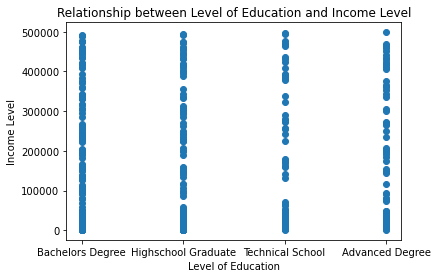

In [102]:
side_comparison('education', 'random_income', 'Level of Education', 'Income Level')

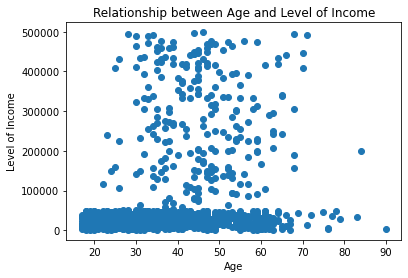

In [103]:
side_comparison('age', 'random_income', 'Age', 'Level of Income')

Based on this graph, it's hard to tell if there is any real relationship between age and the level of income. Instead we will explore the median income ranges by age below.

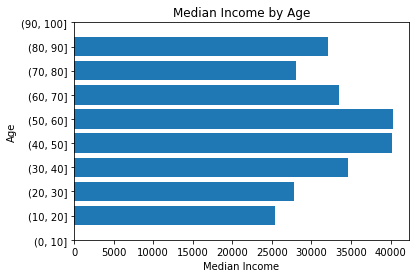

In [108]:
#Defining age intervals
age_intervals = np.arange(0, 101, 10)

#Grouping the data by age and calculating the median income for each age group
median_income_by_age = adult.groupby(pd.cut(adult['age'], bins=age_intervals))['random_income'].median()

# Create a box plot of median income by age
plt.barh(range(len(median_income_by_age)), median_income_by_age)
plt.yticks(range(len(median_income_by_age)), median_income_by_age.index.astype(str))

plt.xlabel('Median Income')
plt.ylabel('Age')
plt.title('Median Income by Age')
plt.show()

Now based on this graph we can see a better relationship between Age and Income Level. Adults between the ages of 40-60 earn the highest median income amongst the other age groups. Median income grows from age range 10 - 60, then after 60 the median income begins to fall. This is most likely attributed to retired and adults leaving the workforce meaning they no longer have active income. 

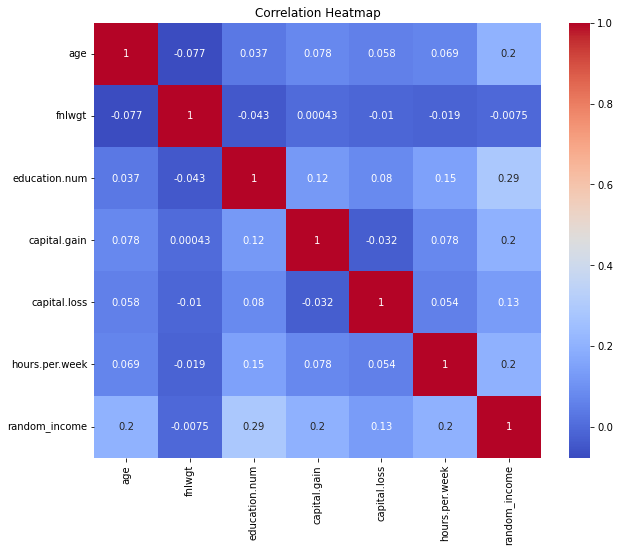

In [109]:
adult_matrix = adult.corr()
plt.figure(figsize=(10,8))
sns.heatmap(adult_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()

A heatmap was used just to visualize the correlation between each variable and further understand the results of the data. We can see based on this heat map that there is no direct correlation between any of the variables.

In [110]:
adult.to_csv(r'../data/adultupdated.csv')
adult_m.to_csv(r'../data/adult_m.csv')
adult_f.to_csv(r'../data/adult_f.csv')

# Conclusion 

After viewing, cleaning and understanding the data we were able to answer all of the questions proposed at the beginning of the notebook. This was an interesting data set to experiment with as there were a lot of assumptions made in order to conduct the analysis. Ultimately, the goal was to try and limit any bias when looking at the data, so random sample sizes were used and also random income levels were generated. 